IMPORTING ALL THE LIBRARIES

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/reisanar/datasets/master/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
(200, 4)
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

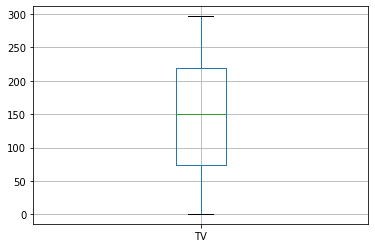

In [5]:
data.boxplot(column='TV')

ASSUMPTION OF LINEAR REGRESSION

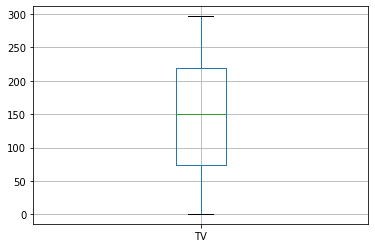

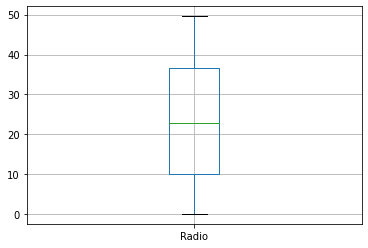

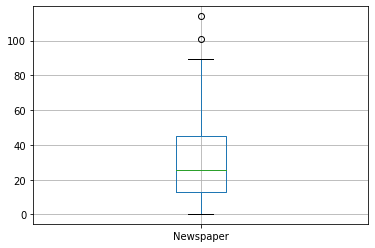

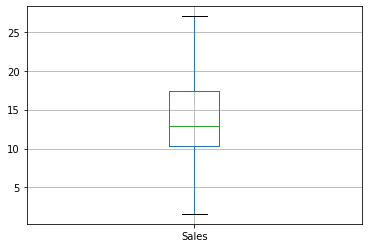

In [6]:
#ASSSUMPTION 1: there should be no outliers in the data ,check using box plot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

<Figure size 2160x1080 with 0 Axes>

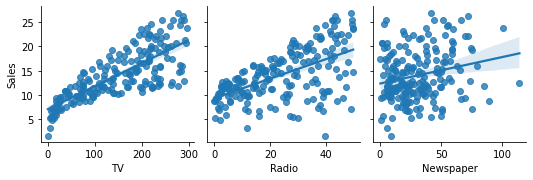

In [7]:
#ASSUMATIONassumptions  of linearity:every independent  var should have linear relationship with dependent var
plt.figure(figsize=(30,15))
sns.pairplot(data ,x_vars=data.columns[0:-1],y_vars='Sales',kind='reg')             
plt.show()



In [8]:
data.columns[0:-1]

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [9]:
X=data.iloc[:,0:-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
#create x and y
X=data.iloc[:,0:-1]
#X=data[['TV', 'Radio', 'Newspaper']]
Y=data['Sales']

C:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

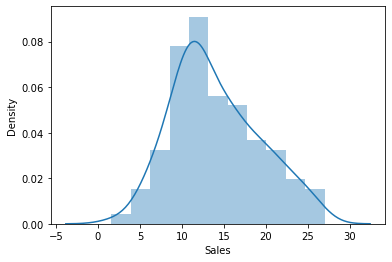

In [11]:
#assumption of normality:the dependent variable should follow an appropriate normal distn

sns.distplot(Y,hist=True)

# log tranformation

In [12]:

#log tranformation
import numpy as np
Y_log=np.log(Y)


C:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

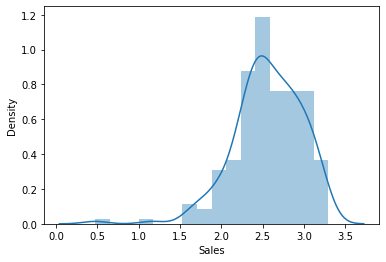

In [13]:
sns.distplot(Y_log,hist=True)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>, <AxesSubplot:>]],
      dtype=object)

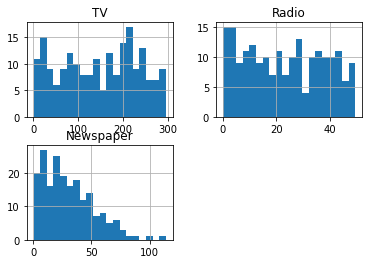

In [14]:
X.hist(bins=20)

In [15]:
from scipy.stats import skew 

#finding the skewness in each variable 
data_num_skew=X.apply(lambda i:skew(i.dropna()))

#subsetting the variables that are highly skewed
data_num_skewed=data_num_skew[(data_num_skew > .75)| (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

#apply lop +1 transformation for all numeric featuers with skweness over .75
X[data_num_skewed.index]=np.log1p(X[data_num_skewed.index])

TV          -0.069328
Radio        0.093467
Newspaper    0.887996
dtype: float64
Newspaper    0.887996
dtype: float64


C:\Users\akshay0909\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.030951
Radio      0.054809  1.000000   0.251909
Newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

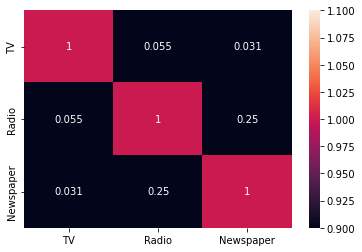

In [16]:
#ASSUMPITON 3: assumpiton of  multicolinearity : There should be no multicolinearity between the independent var and the dependent var
corr_df=X.corr(method='pearson')
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0, vmin=1.0,annot=True)

# VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

vif_df=pd.DataFrame()
vif_df['features'] = X.columns
vif_df['VIF Factor'] = [vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,Radio,3.63
2,Newspaper,5.44


In [18]:
X.shape[1]


3

In [19]:
#X.drop('newspaper',axis=1,inplace=True)
#return the VIF code

In [20]:
#>1000--->test_size=0.3 //<1000---> test_size=0.2

# Training the model

LINEAR REGRESSION MODEL

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=10)

In [22]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()

#train the model
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

3.353291385815158
[ 0.0437425   0.19303708 -0.04895137]


In [23]:
#pair the feature names with coeffecient
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742163), ('Radio', 0.19303707897345293), ('Newspaper', -0.04895136822248805)]


In [24]:
#this you can do when your client says show me how many profit can i make when i invest some amount 
# you can do manual prediction like this
x1=200
x2=300
x3=np.log1p(0) 
#newspaper giving me -ve coefficients so i suggest that dont invest on newspaper

Y_pred=3.353291385815158+(x1* 0.0437425)+(x2*0.19303)+(x3*-0.0489)
Y_pred


70.01079138581515

In [25]:
Y_pred=lm.predict(X_test)
Y_pred

array([18.15026866, 12.96136899, 18.05815332, 23.66025079, 20.68751041,
       14.26325872, 14.92774472, 21.38847375, 21.14752911, 12.75788534,
       23.99735583,  7.20632737, 12.30777109, 19.22813333, 19.41581583,
       13.44985803, 19.62619644,  9.24667496, 21.1052867 , 20.87838433,
       15.52611251, 10.91695579, 22.82910679, 15.82915597, 17.40742204,
        8.17170435, 11.88738387, 12.69866637, 21.71275044,  7.94920205,
       12.49118989, 20.43292079,  4.71443086,  4.72126238, 16.7504848 ,
       15.74384945,  6.74775596, 17.73750244,  9.01170001, 13.60841593])

In [26]:
lm.score(X_train,Y_train) #its gives me r square value

0.920898664750022

In [27]:
new_df=pd.DataFrame()
new_df=X_test

new_df['Actual sales']=Y_test
new_df['Predicted sales']=Y_pred
new_df

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4864/669824831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Actual sales']=Y_test
C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4864/669824831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Predicted sales']=Y_pred


,TV,Radio,Newspaper,Actual sales,Predicted sales
59,210.7,29.5,2.332144,18.4,18.150269
5,8.7,48.9,4.330733,7.2,12.961369
20,218.4,27.7,3.996364,18.0,18.058153
198,283.6,42.0,4.207673,25.5,23.660251
52,216.4,41.7,3.703768,22.6,20.687510
19,147.3,23.9,3.000720,14.6,14.263259
162,188.4,18.1,3.280911,14.9,14.927745
55,198.9,49.4,4.110874,23.7,21.388474
69,216.8,43.9,3.339322,22.3,21.147529
2,17.2,45.9,4.252772,9.3,12.757885


In [28]:
from sklearn.metrics import  r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared value :", r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE VALUE :",rmse)

adjusted_r_2=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted-R-squared value :",adjusted_r_2)

R-squared value : 0.8348010719035319
RMSE VALUE : 2.592976911093061
Adjusted-R-squared value : 0.8322725168816472


In [29]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [30]:
#imagine a scenario, that client send you those test data (40) seprately,
#in that particular case,you can try predictiong those y value  for those observations using the model that you have already train
#and then you can stored those predicted value in a file permenently, such that you can deliver that file  to the client

new_df['Deviation']=new_df['Actual sales']-new_df['Predicted sales']
new_df.to_excel('Sales Prediction.xlsx',header=True,index=True)
new_df.head()

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4864/3705199432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Deviation']=new_df['Actual sales']-new_df['Predicted sales']


,TV,Radio,Newspaper,Actual sales,Predicted sales,Deviation
59,210.7,29.5,2.332144,18.4,18.150269,0.249731
5,8.7,48.9,4.330733,7.2,12.961369,-5.761369
20,218.4,27.7,3.996364,18.0,18.058153,-0.058153
198,283.6,42.0,4.207673,25.5,23.660251,1.839749
52,216.4,41.7,3.703768,22.6,20.687510,1.912490


REGULARIZATION TECHNIQUES

RIDGE

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=10)

In [32]:
from sklearn.linear_model import Ridge
#create a model object
lm=Ridge()

#train the model
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [33]:
Y_pred=lm.predict(X_test)
Y_pred

array([18.14984366, 12.961602  , 18.05844603, 23.66046356, 20.68752578,
       14.26318679, 14.9278479 , 21.38857787, 21.14736702, 12.75811738,
       23.99745819,  7.20656373, 12.30813313, 19.22822402, 19.41619189,
       13.44941112, 19.62559951,  9.24628306, 21.1051215 , 20.87807898,
       15.52579217, 10.91642817, 22.82923662, 15.82939321, 17.40752649,
        8.17207209, 11.88688403, 12.69878967, 21.71245614,  7.94914659,
       12.49142141, 20.43289143,  4.71465713,  4.7216782 , 16.75029355,
       15.74408175,  6.74767421, 17.73713545,  9.01204512, 13.60840942])

In [34]:
from sklearn.metrics import  r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared value :", r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE VALUE :",rmse)

adjusted_r_2=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted-R-squared value :",adjusted_r_2)

R-squared value : 0.8348082644975935
RMSE VALUE : 2.5929204626839977
Adjusted-R-squared value : 0.8322798195664342


LASSO

In [35]:
from sklearn.linear_model import Lasso
#create a model object
lm=Lasso()

#train the model
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [36]:
from sklearn.metrics import  r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared value :", r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE VALUE :",rmse)

adjusted_r_2=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted-R-squared value :",adjusted_r_2)

R-squared value : 0.8348082644975935
RMSE VALUE : 2.5929204626839977
Adjusted-R-squared value : 0.8322798195664342


# ols method


In [37]:
#OLS-->OLS(Y_train,X_train) upper case ols
#ols-->ols(Y~X1+X2+X3)  lower case ols

In [38]:
#fit(X_train,Y_train) --> skelarn
#Y~X1+X2+X3,data=df --->stats model

In [39]:
new_df=pd.DataFrame()
new_df=X_train

new_df['sales']=Y_train
new_df.shape

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4864/586819892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sales']=Y_train


(160, 4)

In [40]:
import statsmodels.formula.api as sm

#create a fitted model with all three features

lm_model=sm.ols(formula='sales~ TV + Radio + Newspaper',data=new_df).fit()

#print the coefficents
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
Radio        0.193037
Newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.10e-85
Time:                        21:16:19   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [41]:
Y_pred=lm_model.predict(X_test)

from sklearn.metrics import  r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared value :", r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE VALUE :",rmse)

adjusted_r_2=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted-R-squared value :",adjusted_r_2)

R-squared value : 0.8348010719035377
RMSE VALUE : 2.5929769110930154
Adjusted-R-squared value : 0.832272516881653


In [42]:
import statsmodels.formula.api as sm

#create a fitted model with all 2 features

lm_model=sm.ols(formula='sales~ TV + Radio ',data=new_df).fit()

#print the coefficents
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
Radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.47e-87
Time:                        21:16:19   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [43]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import  r2_score,mean_squared_error

r2=r2_score(Y_test,Y_pred)
print("R-squared value :", r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE VALUE :",rmse)

adjusted_r_2=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted-R-squared value :",adjusted_r_2)

R-squared value : 0.8348010719035377
RMSE VALUE : 2.58788170773781
Adjusted-R-squared value : 0.832272516881653


C:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

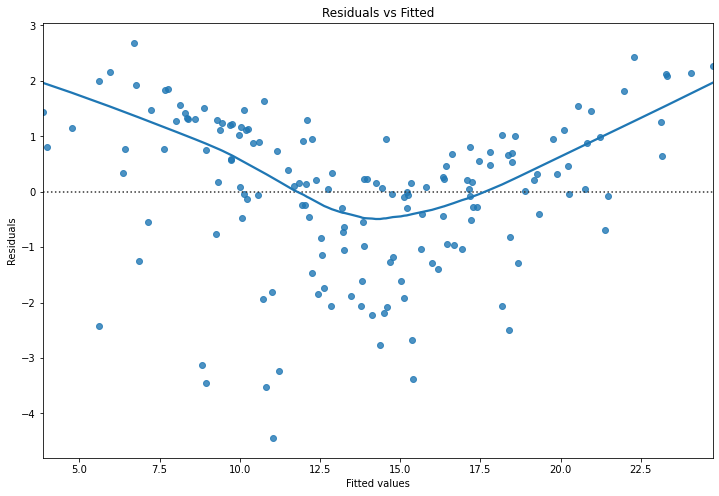

In [44]:
#Assumption : Errors should be random
#checked using Residual v / s Fitted plot
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure (1)
plot_lm_1.set_figheight (8)
plot_lm_1.set_figwidth (12)
#fitted values ( need a constant term for intercept )
model_fitted_y = lm_model.fittedvalues
plot_lm_1.axes [0] = sns.residplot ( model_fitted_y , 'sales' , data = new_df , lowess = True )
plot_lm_1.axes [0] .set_title ('Residuals vs Fitted')
plot_lm_1.axes [0] .set_xlabel ('Fitted values')
plot_lm_1.axes [0] .set_ylabel ('Residuals')

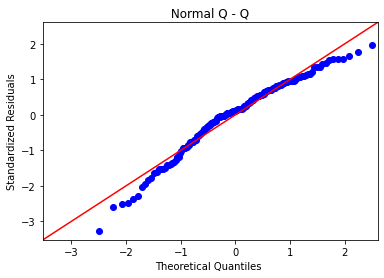

In [45]:
#Assumption : Errors should follow a approximate normal distribution
#checked using Normal QQ plot
res= lm_model . resid
import statsmodels.api as stm
import scipy.stats as stats

fig=stm.qqplot ( res , fit=True , line = '45' )
plt.title(' Normal Q - Q ')
plt.xlabel('Theoretical Quantiles ' )
plt.ylabel('Standardized Residuals')
plt.show ( )

C:\Users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$ \\ sqrt { | Standardized Residuals | } $')

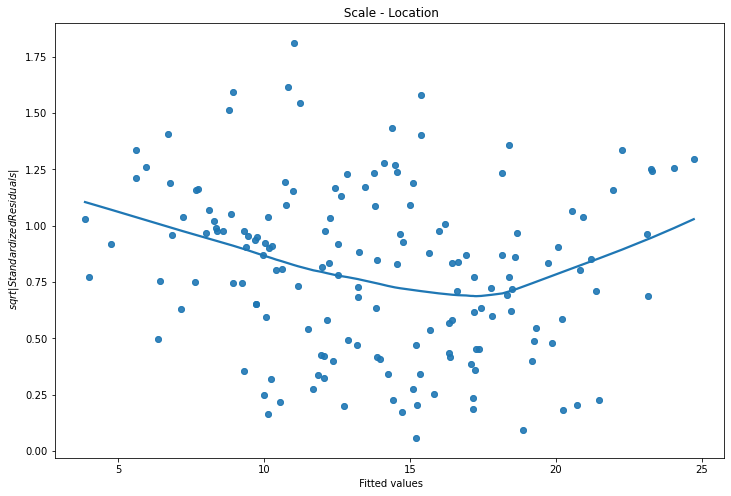

In [46]:
#Assumption : Errors should follow a constant variance -- > Homoskedasticity
#checked using Scale Location plot
# normalized residuals

model_norm_residuals = lm_model.get_influence ( ) . resid_studentized_internal
#absolute squared normalized residuals
model_norm_residuals_abs_sqrt=np.sqrt(np.abs (model_norm_residuals))
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y , model_norm_residuals_abs_sqrt, alpha = 0.5)
sns.regplot(model_fitted_y , model_norm_residuals_abs_sqrt, lowess = True)
plot_lm_3.axes[0].set_title (' Scale - Location')
plot_lm_3.axes[0].set_xlabel (' Fitted values')
plot_lm_3.axes[0].set_ylabel ('$ \ sqrt { | Standardized Residuals | } $')